<h1>Image Datasets and Transforms</h1> 


Download the dataset and unzip the files in your data directory, **to download faster this dataset has only 100 samples**:


In [10]:
"""
Download data from here
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv
unzip to your data folder
!tar -xf ../Datasets/img.tar.gz -C ../Datasets/
"""

'\nDownload data from here\n!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz\n!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv\nunzip to your data folder\n!tar -xf ../Datasets/img.tar.gz -C ../Datasets/\n'

In [11]:
# Import libraries

import torch 
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os

In [12]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [13]:
# Read CSV file from the URL and print out the first five samples
directory="../Datasets/Fashion"
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

In [14]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [17]:
# Get the value on location row 0, column 1
#rember this dataset has only 100 samples to make the download faster  
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


In [18]:
# Get the value on location row 0, column 0 

print('y:', data_name.iloc[0, 0])

y: Ankle boot


In [19]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class or y:', data_name.iloc[1, 0])

File name: img/fashion1.png
class or y: T-shirt


In [20]:
# Print out the total number of rows in traing dataset

print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


<h2 id="load_image">Load Image</h2>


In [21]:
# Combine the directory path with file name

image_name = data_name.iloc[1, 1]
image_name

'img/fashion1.png'

we can find the image path:


In [22]:
image_path=os.path.join(directory,image_name)
image_path

'../Datasets/Fashion\\img/fashion1.png'

You can then use the function <code>Image.open</code> to store the image to the variable <code>image</code> and display the image and class .


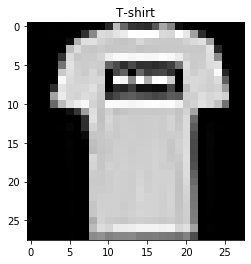

In [23]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

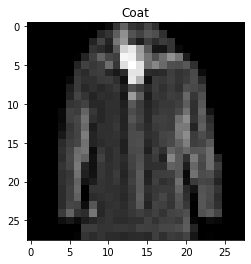

In [24]:
# Plot the 20th image

image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[19, 0])
plt.show()

<h2 id="data_class">Create a Dataset Class</h2>


In [25]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [26]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

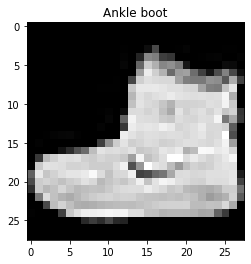

In [27]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [28]:
y

'Ankle boot'

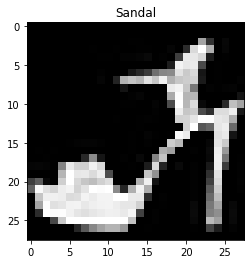

In [29]:
image=dataset[9][0]
y=dataset[9][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

<h2 id="Torchvision"> Torchvision Transforms  </h2>


In [30]:
from torchvision import transforms

In [36]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

data_transform = transforms.Compose([
    transforms.CenterCrop(20),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()])

dataset = Dataset(csv_file=csv_file , data_dir=directory, transform=data_transform )

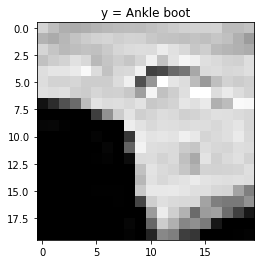

In [37]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))